# Data Science Project - Satendra kumar

In [155]:
#setting local path 
your_local_path="D:/SK00500469/Downloads/AI_course/Numpy_and_Pandas/Project/"

In [206]:
#importing important dependencies and packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [158]:
#reading data from csv file
wine_input_data=pd.read_csv(your_local_path+"Project_3_Wine_Quality_data/winequality.csv",delimiter=';')

In [159]:
#printing raw data
wine_input_data[:20]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [160]:
#checking if the raw data contains any null value
wine_input_data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [161]:
#getting some information or idea about the data we have
wine_input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


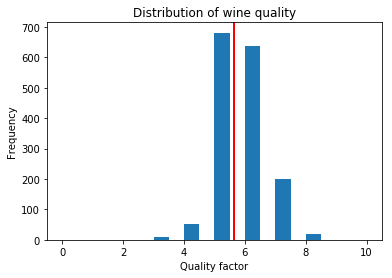

mean of wine_input_data is:  5.6360225140712945


In [162]:
#plotting wine quality distribution on values
plt.hist(wine_input_data['quality'], range = (0,10), bins = 20)
# Add axis labels
plt.xlabel("Quality factor")
plt.ylabel("Frequency")
plt.title("Distribution of wine quality")
#plotting mean value as red line
plt.axvline(x=wine_input_data['quality'].mean(), linewidth=2, color = 'r') 
plt.show()
#printing mean value for quality attribute
print("mean of wine_input_data is: ",wine_input_data['quality'].mean())

About 82 observations get 5-6 ratings, while only 14 (227 counts) got 3,7 or 8 scores on quality rating.
Now let’s check quality by dividing them into 3 groups: "Bad"(3-4), "Average"(5-6), "Good"(7-8)

In [163]:
#printing total count of wine data
n_wines = wine_input_data.shape[0]
n_wines

1599

In [164]:
# Number of wines with quality rating above 6
good_quality = wine_input_data.loc[(wine_input_data['quality'] > 6)]
good_quality_n = good_quality.shape[0]
print(good_quality_n)
good_quality[:20]

217


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
16,8.5,0.280,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7
62,7.5,0.520,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.5,7
128,8.0,0.590,0.16,1.8,0.065,3.0,16.0,0.99620,3.42,0.92,10.5,7
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,7
200,9.6,0.320,0.47,1.4,0.056,9.0,24.0,0.99695,3.22,0.82,10.3,7
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7


In [165]:
# Number of wines with quality rating below 5
Bad_quality = wine_input_data.loc[(wine_input_data['quality'] < 5)]
Bad_quality_n = Bad_quality.shape[0]
print(Bad_quality_n)
Bad_quality[:20]

63


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
38,5.7,1.130,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,4
45,4.6,0.520,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2,4
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
94,5.0,1.020,0.04,1.4,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
151,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
161,7.6,0.680,0.02,1.3,0.072,9.0,20.0,0.99650,3.17,1.08,9.2,4
167,7.3,0.550,0.03,1.6,0.072,17.0,42.0,0.99560,3.37,0.48,9.0,4


In [166]:
# Number of wines with quality rating between 5 to 6
avg_quality = wine_input_data.loc[(wine_input_data['quality'] >= 5) & (wine_input_data['quality'] <= 6)]
avg_quality_n = avg_quality.shape[0]
print(avg_quality_n)
avg_quality[:20]

1319


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [167]:
# Percentage of wines with quality rating above 6
greater_percent = good_quality_n*100/n_wines
greater_percent

13.570981863664791

In [168]:
# Print the results
print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 7 and above: {}".format(good_quality_n))
print("Wines with rating less than 5: {}".format(Bad_quality_n))
print("Wines with rating 5 and 6: {}".format(avg_quality_n))
print("Percentage of wines with quality 7 and above: {:.2f}%".format(greater_percent))

Total number of wine data: 1599
Wines with rating 7 and above: 217
Wines with rating less than 5: 63
Wines with rating 5 and 6: 1319
Percentage of wines with quality 7 and above: 13.57%


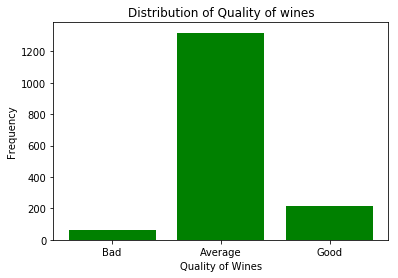

In [169]:
#plotting Qualities of wine
wine_quality_dict = {"Bad":Bad_quality_n,'Average':avg_quality_n,'Good':good_quality_n}
# Add axis labels
plt.xlabel("Quality of Wines")
plt.ylabel("Frequency")
plt.title("Distribution of Quality of wines")
plt.bar(wine_quality_dict.keys(), wine_quality_dict.values(), color='g')
plt.show()

The moderate(Avg) quality wines takes up most part and we have much less data on low/high quality wines, which might produce some bias in this analysis. But we hope that the data is reliable and trustworthy.

In [170]:
#Getting more information of wines listed
wine_data_summary=wine_input_data.describe()
wine_data_summary

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Univariate Analysis

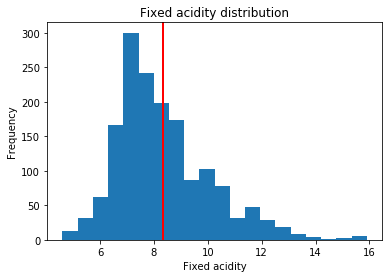

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64


In [208]:
#plotting histogram of fixed acidity
plt.hist(wine_input_data['fixed acidity'], range = [wine_input_data['fixed acidity'].min(),wine_input_data['fixed acidity'].max()], bins = 20)
# Add axis labels
plt.xlabel("Fixed acidity")
plt.ylabel("Frequency")
plt.title("Fixed acidity distribution")
plt.axvline(x=wine_input_data['fixed acidity'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['fixed acidity'].describe())

The histogram a little right-skewed distributed with some outliers located at right side. The most frequent values are between 7-8. IQR is 2.1.

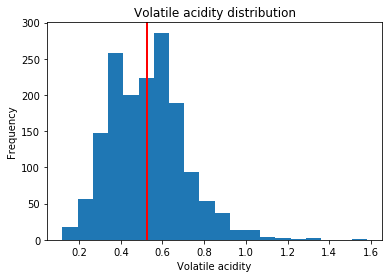

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64


In [172]:
#plotting histogram of volatile acidity
plt.hist(wine_input_data['volatile acidity'], range = [wine_input_data['volatile acidity'].min(),wine_input_data['volatile acidity'].max()], bins = 20)
# Add axis labels
plt.xlabel("Volatile acidity")
plt.ylabel("Frequency")
plt.title("Volatile acidity distribution")
plt.axvline(x=wine_input_data['volatile acidity'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['volatile acidity'].describe())

The histogram is right-skewed distributed with some outliers located at right side. The most frequent values are between 0.4-0.6.

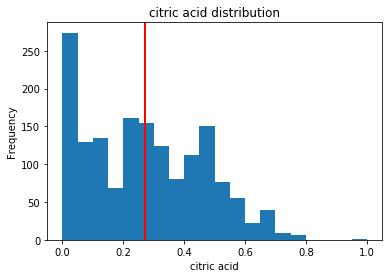

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64


In [173]:
#plotting histogram of citric acid
plt.hist(wine_input_data['citric acid'], range = [wine_input_data['citric acid'].min(),wine_input_data['citric acid'].max()], bins = 20)
# Add axis labels
plt.xlabel("citric acid")
plt.ylabel("Frequency")
plt.title("citric acid distribution")
plt.axvline(x=wine_input_data['citric acid'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['citric acid'].describe())

“citric.acid” is right-skewed distributed with some outliers located at very right side. The most frequent values 0. It’s also interesting a lot of wine have citric.acid = 0.

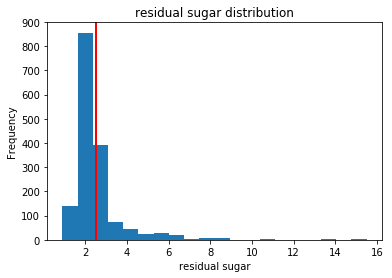

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


In [174]:
#plotting histogram of residual sugar
plt.hist(wine_input_data['residual sugar'], range = [wine_input_data['residual sugar'].min(),wine_input_data['residual sugar'].max()], bins = 20)
# Add axis labels
plt.xlabel("residual sugar")
plt.ylabel("Frequency")
plt.title("residual sugar distribution")
plt.axvline(x=wine_input_data['residual sugar'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['residual sugar'].describe())

“residual.sugar” is right-skewed distributed with a lot of outliers located at right side and a little bit at left side. The most frequent values are between 1.9-2.4. However, the maximum is locate too far away from 3rd quantile.

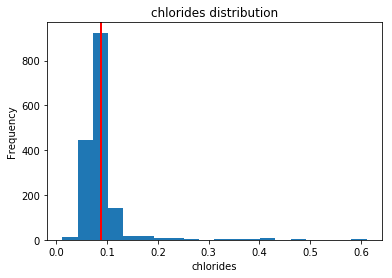

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64


In [175]:
#plotting histogram of chlorides
plt.hist(wine_input_data['chlorides'], range = [wine_input_data['chlorides'].min(),wine_input_data['chlorides'].max()], bins = 20)
# Add axis labels
plt.xlabel("chlorides")
plt.ylabel("Frequency")
plt.title("chlorides distribution")
plt.axvline(x=wine_input_data['chlorides'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['chlorides'].describe())

“chlorides” is right-skewed distributed with a lot of outliers located at right side. The most frequent values are between 0.062-0.112.

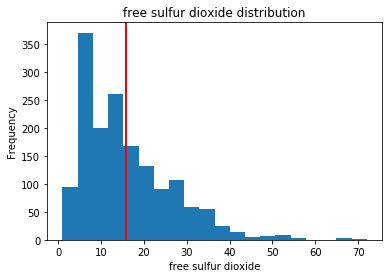

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64


In [176]:
#plotting histogram of free sulfur dioxide
plt.hist(wine_input_data['free sulfur dioxide'], range = [wine_input_data['free sulfur dioxide'].min(),wine_input_data['free sulfur dioxide'].max()], bins = 20)
# Add axis labels
plt.xlabel("free sulfur dioxide")
plt.ylabel("Frequency")
plt.title("free sulfur dioxide distribution")
plt.axvline(x=wine_input_data['free sulfur dioxide'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['free sulfur dioxide'].describe())

“free.sulfur.dioxide” is right-skewed distributed with a lot of outliers located at right side. The most frequent values are between 5-15. 

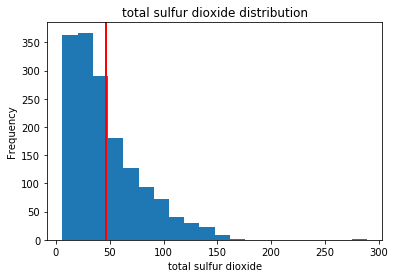

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64


In [177]:
#plotting histogram of total sulfur dioxide
plt.hist(wine_input_data['total sulfur dioxide'], range = [wine_input_data['total sulfur dioxide'].min(),wine_input_data['total sulfur dioxide'].max()], bins = 20)
# Add axis labels
plt.xlabel("total sulfur dioxide")
plt.ylabel("Frequency")
plt.title("total sulfur dioxide distribution")
plt.axvline(x=wine_input_data['total sulfur dioxide'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['total sulfur dioxide'].describe())

“total.sulfur.dioxide” is right-skewed distributed with some outliers located at right side. The most frequent values are between 10-45.

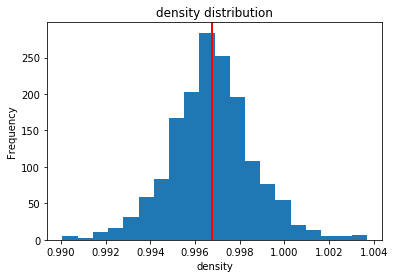

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64


In [178]:
#plotting histogram of density
plt.hist(wine_input_data['density'], range = [wine_input_data['density'].min(),wine_input_data['density'].max()], bins = 20)
# Add axis labels
plt.xlabel("density")
plt.ylabel("Frequency")
plt.title("density distribution")
plt.axvline(x=wine_input_data['density'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['density'].describe())

“density” is approximately symmetric, and it’s surprising the difference among different wines, though they might test significantly different, are not that big. 

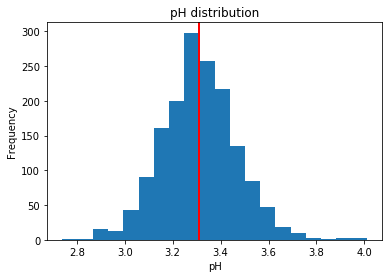

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64


In [179]:
#plotting histogram of pH
plt.hist(wine_input_data['pH'], range = [wine_input_data['pH'].min(),wine_input_data['pH'].max()], bins = 20)
# Add axis labels
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.title("pH distribution")
plt.axvline(x=wine_input_data['pH'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['pH'].describe())

“pH” is almost symmetric. The most frequent value is between 3.24 and 3.44. It’s not a big difference.

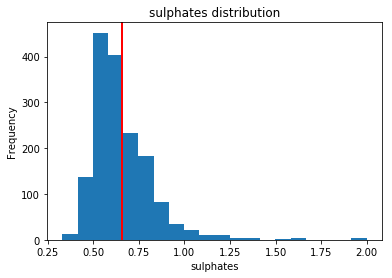

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64


In [180]:
#plotting histogram of sulphates
plt.hist(wine_input_data['sulphates'], range = [wine_input_data['sulphates'].min(),wine_input_data['sulphates'].max()], bins = 20)
# Add axis labels
plt.xlabel("sulphates")
plt.ylabel("Frequency")
plt.title("sulphates distribution")
plt.axvline(x=wine_input_data['sulphates'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['sulphates'].describe())

“sulphates” is a little bit right-skewed distributed with some outliers located at right side. The most frequent values are between 0.5-0.7.

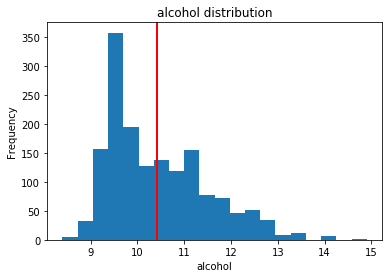

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


In [181]:
#plotting histogram of alcohol
plt.hist(wine_input_data['alcohol'], range = [wine_input_data['alcohol'].min(),wine_input_data['alcohol'].max()], bins = 20)
# Add axis labels
plt.xlabel("alcohol")
plt.ylabel("Frequency")
plt.title("alcohol distribution")
plt.axvline(x=wine_input_data['alcohol'].mean(), linewidth=2, color = 'r') 
plt.show()
print(wine_input_data['alcohol'].describe())

“alcohol” is right-skewed distributed with some outliers located at right side. The most frequent values are between 9.4-9.6.

# Bivariate Analysis

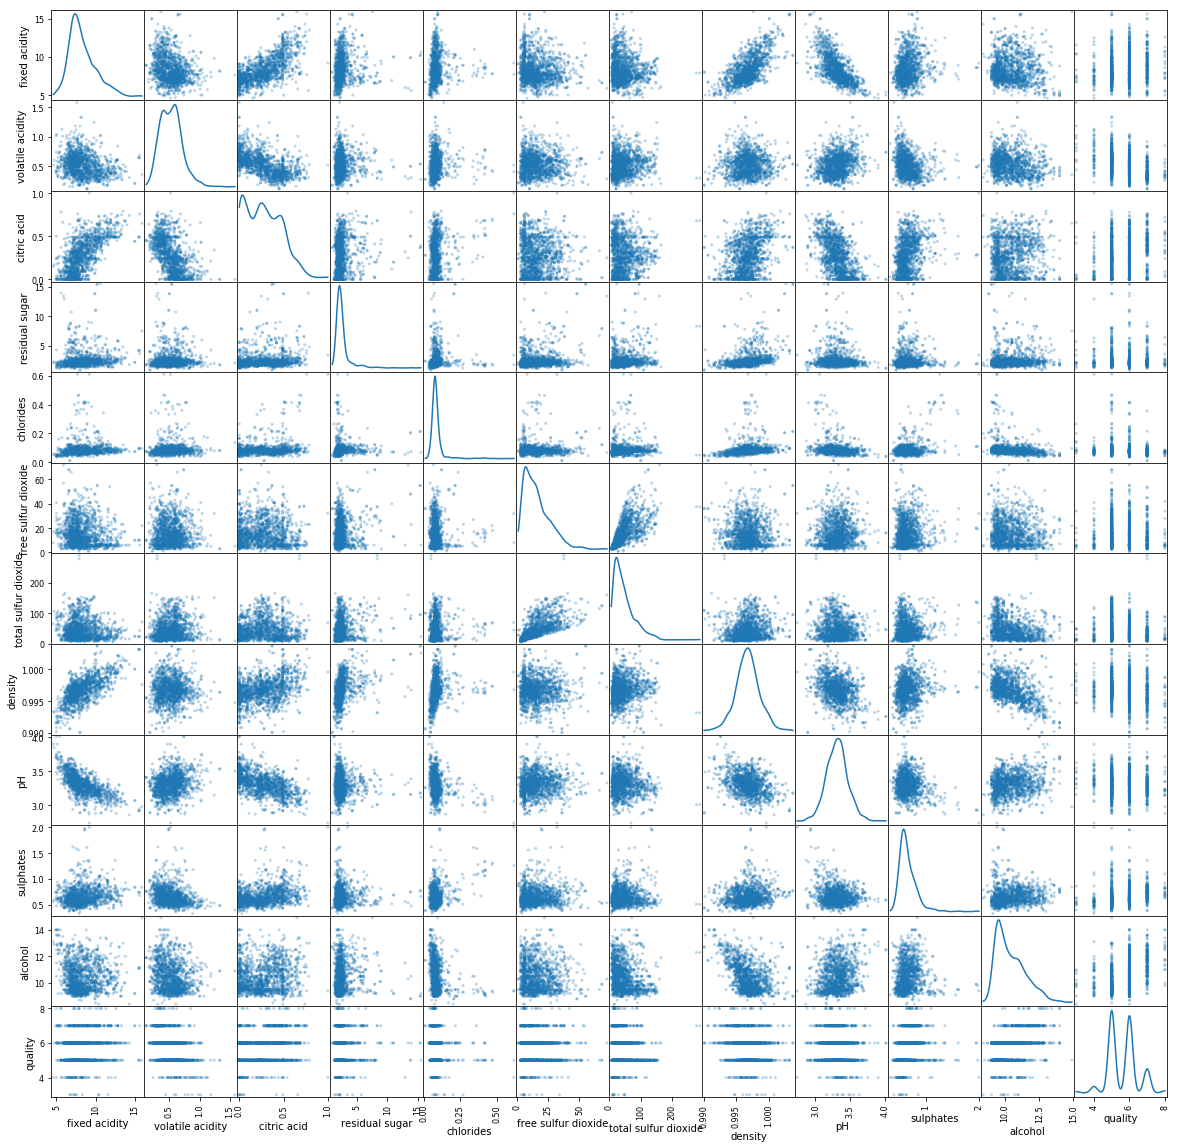

In [182]:
#creating scatter plot to analyse the behaviour of variables with each other
pd.plotting.scatter_matrix(wine_input_data, alpha = 0.3, figsize = (20,20), diagonal = 'kde');

From the above scatterplot we can get some interesting details. For some of the features, the distribution appears to be fairly linear. For some others, the distribution appears to be negatively skewed. So this confirms our initial suspicions — there are indeed some interesting co-dependencies between some of the features.

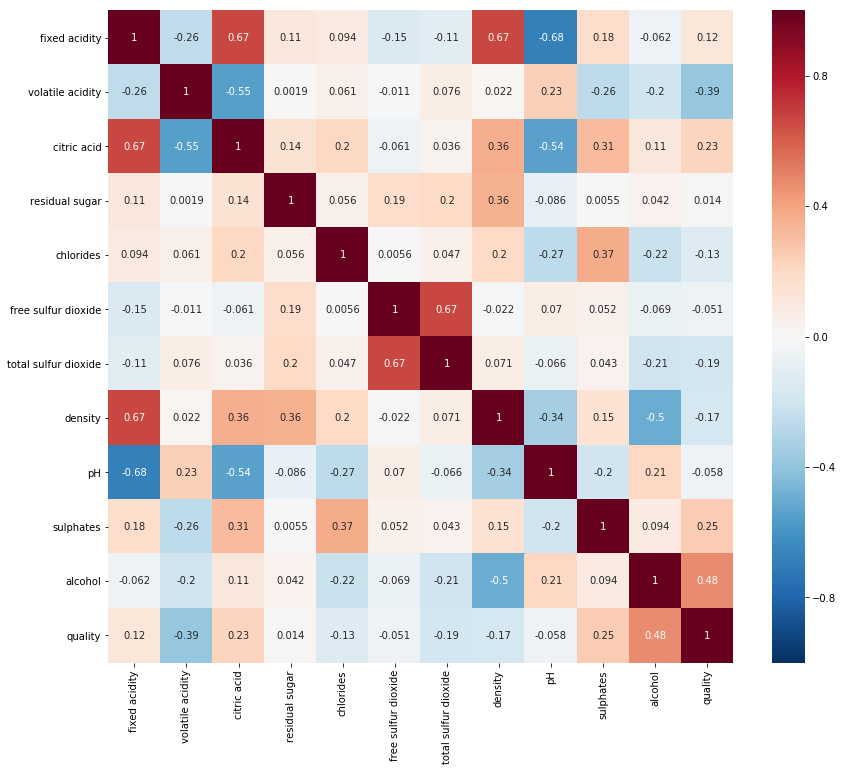

In [209]:
#create correlation matrix to figure out which attributes are worth further exploring.
correlation = wine_input_data.corr() # display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

As you can see, the squares with positive values show direct co-relationships between features. The higher the values, the stronger these relationships are — they’ll be more reddish. That means, if one feature increases, the other one also tends to increase, and vice-versa.

The squares that have negative values show an inverse co-relationship. The more negative these values get, the more inversely proportional they are, and they’ll be more blue. This means that if the value of one feature is higher, the value of the other one gets lower.

For example, citric.acidity associates positively with fixed.acidity, while pH negatively associates with fixed.acidity. However, there seems no attributes have strong correlation with quality.

Finally, squares close to zero indicate almost no co-dependency between those sets of features.

# Dividing quality score into 3 different categories

In [184]:
#grouping of wines according to their Quality
grouped_wine_data=wine_input_data.groupby(['quality']).mean()
grouped_wine_data


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


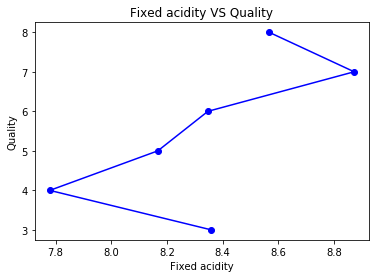

In [185]:
#plot Fixed acidity Vs Quality
plt.plot(grouped_wine_data['fixed acidity'], grouped_wine_data.index, 'bo-')
plt.xlabel ('Fixed acidity')
plt.ylabel ('Quality')
plt.title ('Fixed acidity VS Quality')
plt.show()

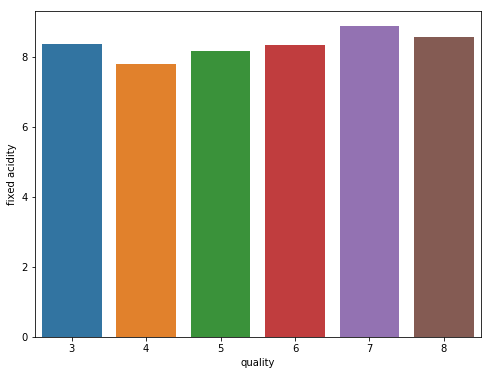

In [186]:
#barplot Fixed acidity Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['fixed acidity'], data = grouped_wine_data)

As we can see, Fixed Acidity has almost no effect on the Quality. The values are random and no pattern is found between them to conclude the relation.

Text(0.5, 1.0, 'Volatile acidity VS Quality')

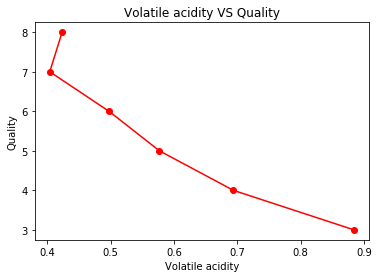

In [187]:
#plot volatile acidity Vs Quality
plt.plot(grouped_wine_data['volatile acidity'] , grouped_wine_data.index, 'ro-') 
plt.xlabel ('Volatile acidity')
plt.ylabel ('Quality')
plt.title ('Volatile acidity VS Quality')

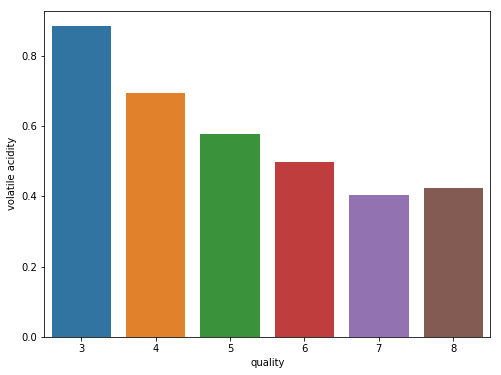

In [188]:
#barplot volatile acidity Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['volatile acidity'], data = grouped_wine_data)

Volatile acid seems to have a negative impact on the quality of the wine. As volatile acid level goes up, the quality of the wine degrades.

Text(0.5, 1.0, 'citric acid VS Quality')

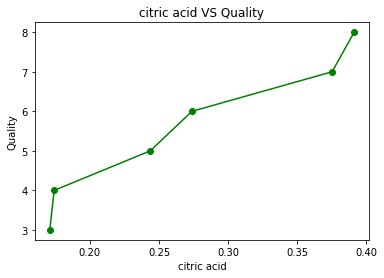

In [189]:
#plot citric acid Vs Quality
plt.plot(grouped_wine_data['citric acid'] , grouped_wine_data.index, 'go-') 
plt.xlabel ('citric acid')
plt.ylabel ('Quality')
plt.title ('citric acid VS Quality')

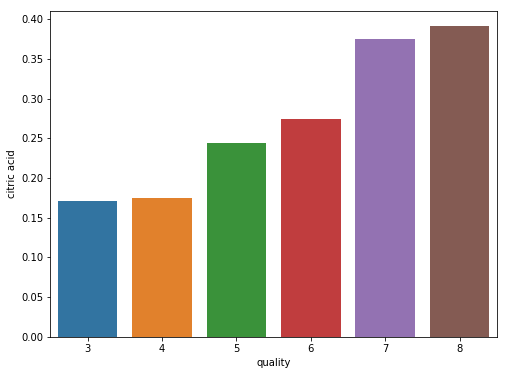

In [190]:
#barplot citric acid Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['citric acid'], data = grouped_wine_data)

Citric acid seems to have a positive correlation with Wine Quality. Better wines have higher Citric Acid.

Text(0.5, 1.0, 'residual sugar VS Quality')

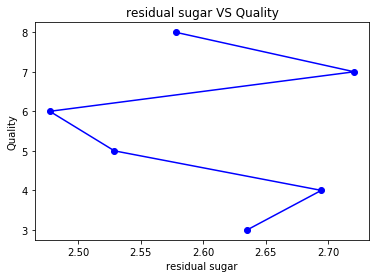

In [191]:
#plot residual sugar Vs Quality
plt.plot(grouped_wine_data['residual sugar'] , grouped_wine_data.index, 'bo-') 
plt.xlabel ('residual sugar')
plt.ylabel ('Quality')
plt.title ('residual sugar VS Quality')

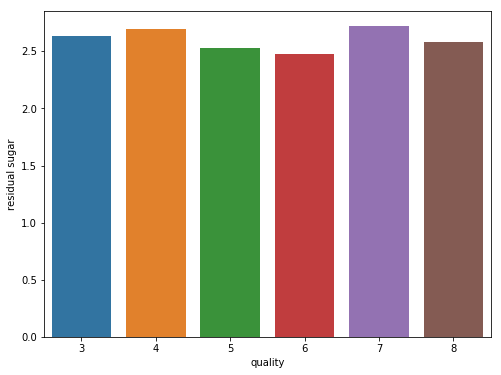

In [192]:
#barplot residual sugar Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['residual sugar'], data = grouped_wine_data)

As we can see, Residual Sugar almost has no effect on the Quality of the Wine.

Text(0.5, 1.0, 'chlorides VS Quality')

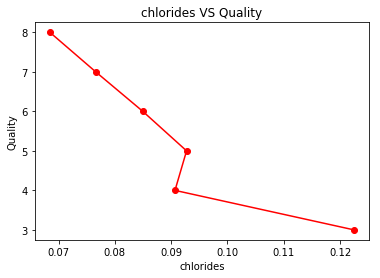

In [193]:
#plot chlorides Vs Quality
plt.plot(grouped_wine_data['chlorides'] , grouped_wine_data.index, 'ro-') 
plt.xlabel ('chlorides')
plt.ylabel ('Quality')
plt.title ('chlorides VS Quality')

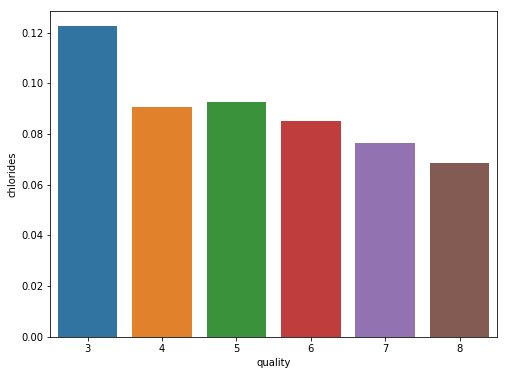

In [194]:
#barplot chlorides Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['chlorides'], data = grouped_wine_data)

From the above barplot, it seems that lower percent of Chloride seems to produce better wines.

Text(0.5, 1.0, 'free sulfur dioxide VS Quality')

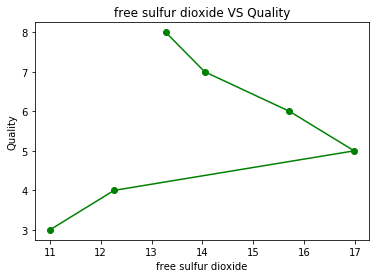

In [195]:
#plot free sulfur dioxide Vs Quality
plt.plot(grouped_wine_data['free sulfur dioxide'] , grouped_wine_data.index, 'go-') 
plt.xlabel ('free sulfur dioxide')
plt.ylabel ('Quality')
plt.title ('free sulfur dioxide VS Quality')

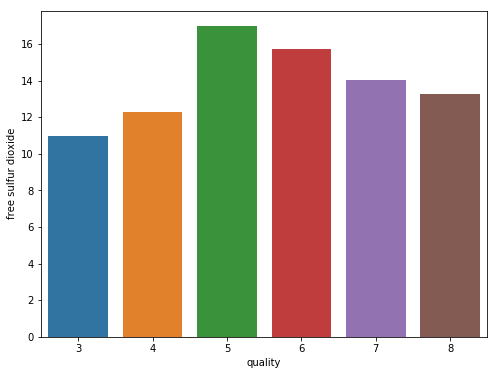

In [196]:
#barplot free sulfur dioxide Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['free sulfur dioxide'], data = grouped_wine_data)

Now this is an interesting observation. We see that too low concentration of Free Sulphur Dioxide produces poor wine and too high concentration results in average wine.

Text(0.5, 1.0, 'total sulfur dioxide')

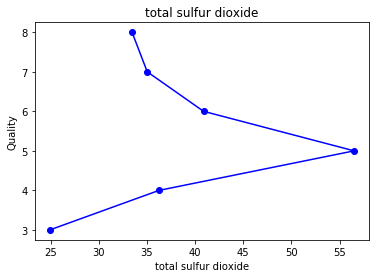

In [197]:
#plot total sulfur dioxide Vs Quality
plt.plot(grouped_wine_data['total sulfur dioxide'] , grouped_wine_data.index, 'bo-') 
plt.xlabel ('total sulfur dioxide')
plt.ylabel ('Quality')
plt.title ('total sulfur dioxide')

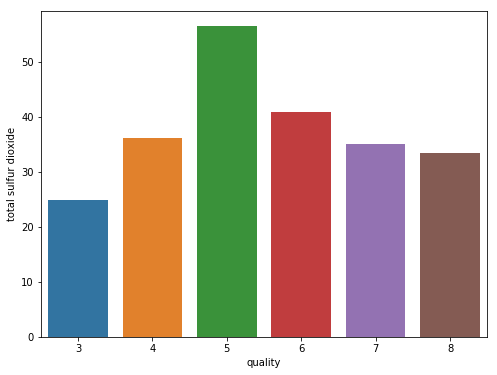

In [198]:
#barplot total sulfur dioxide Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['total sulfur dioxide'], data = grouped_wine_data)

As this is a Subset of Free Sulphur Dioxide, we see a similar pattern here.

Text(0.5, 1.0, 'density VS Quality')

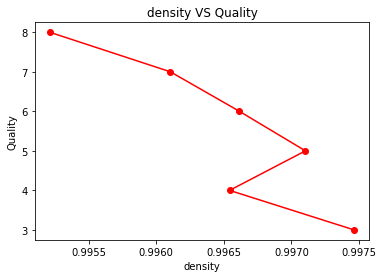

In [199]:
#plot Density Vs Quality
plt.plot(grouped_wine_data['density'] , grouped_wine_data.index, 'ro-') 
plt.xlabel ('density')
plt.ylabel ('Quality')
plt.title ('density VS Quality')

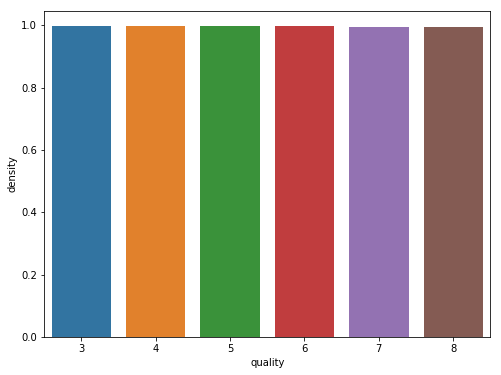

In [200]:
#barplot Density Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['density'], data = grouped_wine_data)

Better wines seems to have lower densities. But we are not sure, as it may be due to some other factors like hiegher alcohol sometimes.

Text(0.5, 1.0, 'pH VS Quality')

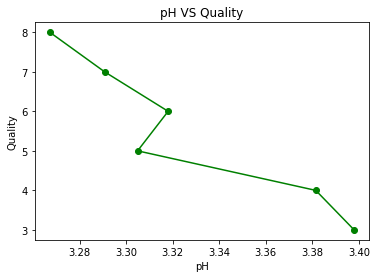

In [201]:
#plot pH Vs Quality
plt.plot(grouped_wine_data['pH'] , grouped_wine_data.index, 'go-') 
plt.xlabel ('pH')
plt.ylabel ('Quality')
plt.title ('pH VS Quality')

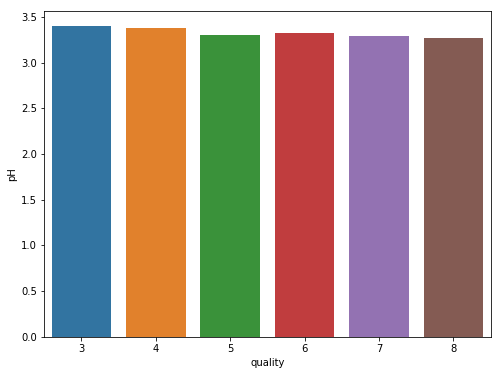

In [202]:
#barplot pH Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['pH'], data = grouped_wine_data)

Better wines seems to have low pH, means more acidic.

Text(0.5, 1.0, 'sulphates VS Quality')

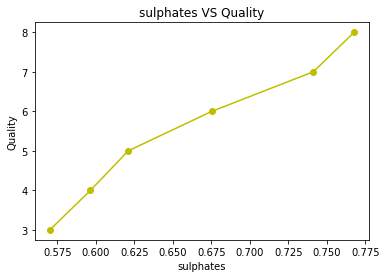

In [203]:
#plot Sulphates Vs Quality
plt.plot(grouped_wine_data['sulphates'] , grouped_wine_data.index, 'yo-') 
plt.xlabel ('sulphates')
plt.ylabel ('Quality')
plt.title ('sulphates VS Quality')

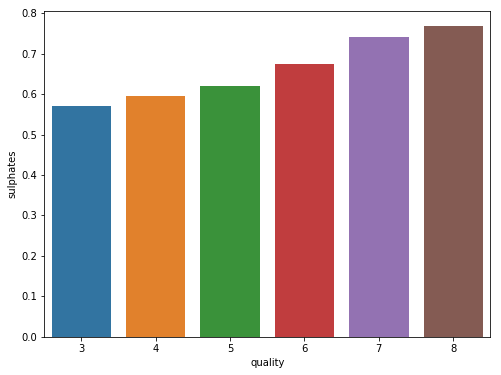

In [210]:
#barplot Sulphates Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['sulphates'], data = grouped_wine_data)

from the above barplot, we can see hiegher the sulphates level better will be the wine. 

Text(0.5, 1.0, 'alcohol VS Quality')

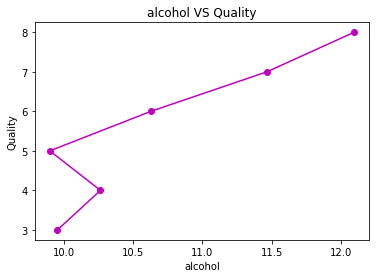

In [204]:
#plot Alcohol Vs Quality
plt.plot(grouped_wine_data['alcohol'] , grouped_wine_data.index, 'mo-') 
plt.xlabel ('alcohol')
plt.ylabel ('Quality')
plt.title ('alcohol VS Quality')

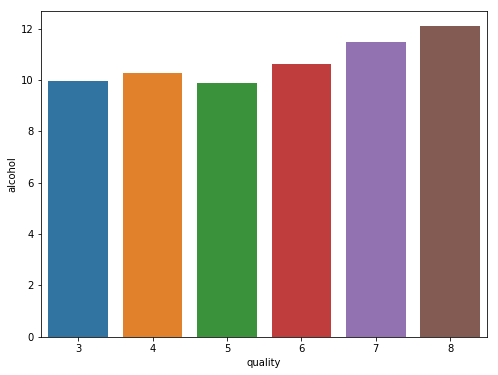

In [205]:
#barplot Alcohol Vs Quality
fig = plt.figure(figsize = (8,6))
sns.barplot(x = grouped_wine_data.index, y = grouped_wine_data['alcohol'], data = grouped_wine_data)

It seems like with the increase in alcohol level, the quality of wine gets better. But we can't be so sure as there is some strange behaviour for 4 and 5. So, that may be due to some other factors. 

# Recommended Wine Characteristics

In [ ]:
Characteristics that can influence wine quality positively.
--> volatile acidity is low
--> Citric acid is high
--> Chlorides is low
--> Density is low
--> pH is low
--> Sulphates is high
--> Alcohol level is high

# Faulty Wine Characteristics

In [ ]:
Characteristics that can influence wine quality positively.
--> volatile acidity is High
--> Citric acid is low
--> Chlorides is high
--> Density is high
--> pH is high
--> Sulphates is low
--> Alcohol level is low